# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Loading the dataset

In [2]:
X, y = load_diabetes(return_X_y=True)
cols = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
df = pd.DataFrame(X, columns=cols)
df["disease progression"] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  442 non-null    float64
 1   sex                  442 non-null    float64
 2   bmi                  442 non-null    float64
 3   bp                   442 non-null    float64
 4   s1                   442 non-null    float64
 5   s2                   442 non-null    float64
 6   s3                   442 non-null    float64
 7   s4                   442 non-null    float64
 8   s5                   442 non-null    float64
 9   s6                   442 non-null    float64
 10  disease progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


## Describing the dataset

In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


## Splitting the dataset into the Training set and Test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (309, 10)
X_test  (133, 10)
y_train (309,)
y_test  (133,)


## Training the Multiple Linear Regression model

In [6]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## Predicting the test set

In [7]:
y_pred = reg.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred}).astype("int")
result.head(10)

,Actual,Predict
0,75,77
1,128,170
2,125,109
3,332,223
4,37,87
5,121,211
6,259,223
7,72,52
8,40,149
9,281,294


[]

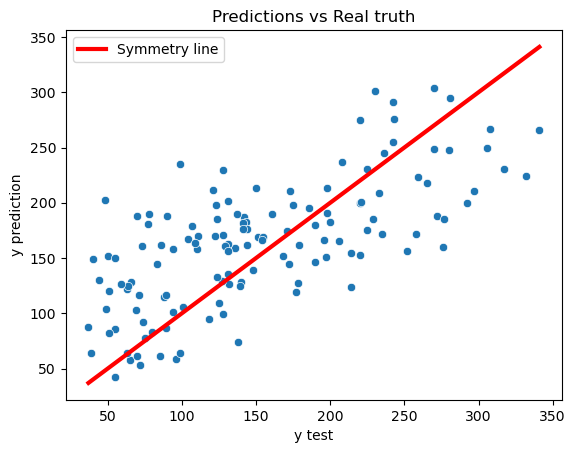

In [8]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred);
plt.plot(symmetry_line, symmetry_line, color="red", linewidth=3, label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real truth")
plt.legend()
plt.plot()

## Plotting the residuals

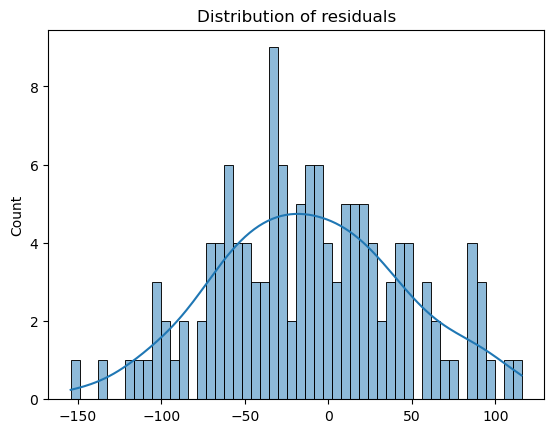

In [9]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Observing the coefficients

In [10]:
cdf = pd.DataFrame(
    reg.coef_, df.columns[:-1], ["coefficients"]
    ).sort_values("coefficients", ascending=False)
cdf

,coefficients
s5,661.953326
bmi,517.183450
bp,386.065619
s2,275.314483
s4,172.391013
s6,62.260688
age,40.661792
s3,3.920156
sex,-313.293470
s1,-604.642893


## Evaluating the model

In [11]:
r2 = r2_score(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")

The R2 score of the model: 0.455
